# Kategorizace dat

- Kategorizace umožňuje rozdělit kontinuální data do kategorií, což je užitečné při analýze a vizualizaci dat. V pandas slouží ke kategorizaci dat zejména metody `cut()` a `qcut()`.
- **Metoda `cut()`**: Rozdělí data do stejně velkých intervalů nebo do intervalů specifikovaných uživatelem.
- **Metoda `qcut()`**: Rozdělí data na základě kvantilů, čímž zajistí, že v každé kategorii bude zhruba stejný počet hodnot.

## Metoda `cut()`

- Kategorizuje data buď do **stejně velkých kategorií** nebo do **uživatelem definovaných intervalů**.
- Intervaly jsou ve výchozím nastavení **otevřené zleva** a **uzavřené zprava**.
    - Pokud chcete, aby intervaly byly **uzavřené zleva** (tedy aby zahrnovaly dolní hranici), nastavte argument `include_lowest=True`.
    - Pokud chcete, aby intervaly byly **otevřené zprava**, můžete nastavit argument `right=False`.

### Další možnosti metody `cut()`:
- **int**: Definuje počet kategorií (stejně širokých intervalů) v rozsahu hodnot `x`. Rozsah hodnot `x` je rozšířen o 0,1 % na každé straně, aby zahrnoval minimální a maximální hodnoty `x`.
- **bins**: Počet kategorií nebo explicitně definované intervaly. Pokud zadáte celé číslo, metoda rozdělí data do tohoto počtu stejně velkých intervalů.
- **labels**: Můžete specifikovat vlastní názvy kategorií, které budou použity místo číselných intervalů.
- **retbins**: Pokud je nastaveno na `True`, metoda vrátí i samotné hranice kategorií.
  
Příklady použití:
- Rozdělení dat do čtyř stejně velkých intervalů.
- Použití uživatelem definovaných intervalů (např. rozdělení věku na kategorie jako "mladý", "střední věk", "starší").

## Metoda `qcut()`

- **Kategorizace dle kvantilů**: Rozděluje data na základě kvantilů (např. kvartily, decily), což znamená, že v každé kategorii bude přibližně stejný počet hodnot.
- **Počet kategorií**: U metody `qcut()` zadáváte počet kategorií (např. `q=4` pro kvartily nebo `q=10` pro decily).
- **Výhoda**: Na rozdíl od `cut()` nemusí být intervaly stejně velké, ale zajišťuje, že v každé kategorii bude podobný počet hodnot, což je užitečné při analýze distribuce dat.

### Další možnosti metody `qcut()`:
- **precision**: Definuje počet desetinných míst při určování hranic kategorií.
- **duplicates**: Pokud se vyskytnou duplicitní hranice kvantilů, můžete tuto chybu zpracovat pomocí tohoto argumentu (např. pokud máte více stejných hodnot).

Příklady použití:
- Rozdělení dat do kvartilů (čtyři skupiny s přibližně stejným počtem hodnot).
- Rozdělení dat do decilů (deset skupin).

### Shrnutí:
- **`cut()`** je užitečné, pokud chcete rozdělit data do předdefinovaných intervalů nebo stejně velkých kategorií.
- **`qcut()`** je vhodné, pokud chcete rozdělit data podle distribuce a zajistit přibližně stejný počet hodnot v každé kategorii.


In [1]:
import pandas as pd
improt numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter = ';')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE',drop=True,inplace=True)

In [2]:
df1 = df.copy()
# Vytvoreni 5 intervalu o stejnych delkach bez urceni popisku dat
df1['typ srazek'] = pd.cut(df1['PRCP'],5)
df1['typ srazek'].unique()

[(-0.14, 28.0], (28.0, 56.0], (56.0, 84.0], (84.0, 112.0], NaN, (112.0, 140.0]]
Categories (5, interval[float64, right]): [(-0.14, 28.0] < (28.0, 56.0] < (56.0, 84.0] < (84.0, 112.0] < (112.0, 140.0]]

In [3]:
df2 = df.copy()
# Inteval uzavreny zleva i zprava s pridanim popisku dat
# V tomto pripade je hodnota 0 zarazena do intervalu s popiskem "neprselo"
df2['typ srazek'] = pd.cut(df2['PRCP'],bins=[-np.inf,0,5,10,np.inf],labels = ['neprselo','prselo malo','prselo akorat','prselo moc'],include_lowest=True,right=True)
df2.head(10)

STATION    NAME  PRCP  SNWD  TAVG  TMAX  TMIN     typ srazek
DATE                                                                        
2006-12-01  GME00132274  PIDING   0.0   0.0   NaN   4.2   1.0       neprselo
2006-12-02  GME00132274  PIDING   0.0   0.0   NaN   1.8  -1.7       neprselo
2006-12-03  GME00132274  PIDING   0.0   0.0   NaN   5.1  -4.6       neprselo
2006-12-04  GME00132274  PIDING  19.0   0.0   NaN   8.3  -0.9     prselo moc
2006-12-05  GME00132274  PIDING   0.0   0.0   NaN  12.0   0.9       neprselo
2006-12-06  GME00132274  PIDING   2.2   0.0   NaN  13.3   1.0    prselo malo
2006-12-07  GME00132274  PIDING   0.0   0.0   NaN   8.6  -0.1       neprselo
2006-12-08  GME00132274  PIDING   0.0   0.0   NaN  18.3  -1.7       neprselo
2006-12-09  GME00132274  PIDING   6.8   0.0   NaN   9.3   2.2  prselo akorat
2006-12-10  GME00132274  PIDING   1.0   0.0   NaN   4.6  -3.6    prselo malo

In [4]:
df3 = df.copy()
# Otevreni intervalu zprava, hodnota 0 je nyni v kategorii 'prselo malo'
df3['typ srazek'] = pd.cut(df3['PRCP'],bins=[-np.inf,0,5,10,np.inf],labels = ['neprselo','prselo malo','prselo akorat','prselo moc'],include_lowest=True,right=False)
df3.head(10)

STATION    NAME  PRCP  SNWD  TAVG  TMAX  TMIN     typ srazek
DATE                                                                        
2006-12-01  GME00132274  PIDING   0.0   0.0   NaN   4.2   1.0    prselo malo
2006-12-02  GME00132274  PIDING   0.0   0.0   NaN   1.8  -1.7    prselo malo
2006-12-03  GME00132274  PIDING   0.0   0.0   NaN   5.1  -4.6    prselo malo
2006-12-04  GME00132274  PIDING  19.0   0.0   NaN   8.3  -0.9     prselo moc
2006-12-05  GME00132274  PIDING   0.0   0.0   NaN  12.0   0.9    prselo malo
2006-12-06  GME00132274  PIDING   2.2   0.0   NaN  13.3   1.0    prselo malo
2006-12-07  GME00132274  PIDING   0.0   0.0   NaN   8.6  -0.1    prselo malo
2006-12-08  GME00132274  PIDING   0.0   0.0   NaN  18.3  -1.7    prselo malo
2006-12-09  GME00132274  PIDING   6.8   0.0   NaN   9.3   2.2  prselo akorat
2006-12-10  GME00132274  PIDING   1.0   0.0   NaN   4.6  -3.6    prselo malo

In [5]:
df4 = df.copy()


# Rozdeleni
s = df4['PRCP'].unique()
df4['kategorie srazek'] = pd.qcut(df4['PRCP'],4,duplicates='drop')
#df4.sort_values(by=['PRCP'],ascending=False)
df4['kategorie srazek'].unique()

f = pd.qcut(s,4)

df.describe()

PRCP          SNWD          TAVG          TMAX          TMIN
count  56483.000000  17540.000000  59664.000000  51147.000000  50830.000000
mean       2.390054     29.513512     10.169048     15.272442      5.724139
std        6.191885     59.993963      8.342663      9.508819      7.481063
min        0.000000      0.000000    -21.600000    -17.400000    -23.600000
25%        0.000000      0.000000      3.600000      7.700000      0.200000
50%        0.000000      0.000000     10.500000     16.100000      6.000000
75%        1.800000     30.000000     16.900000     22.900000     11.800000
max      140.000000   1400.000000     30.300000     39.600000     25.300000

C:\Users\Student\AppData\Local\Temp\ipykernel_7440\1940710212.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(by='PRCP INTERVAL')['DATE'].count()


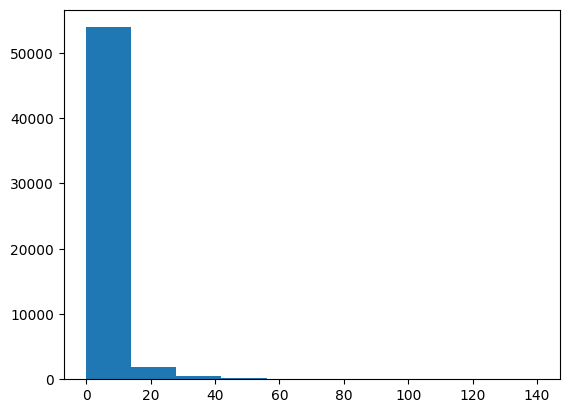

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter = ';')
df['DATE'] = pd.to_datetime(df['DATE'])

plt.hist(df['PRCP'],10)


df['PRCP INTERVAL'] = pd.cut(df['PRCP'],10)
df = df.groupby(by='PRCP INTERVAL')['DATE'].count()
